# Preliminaries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [3]:
uaap_df = pd.read_csv('Data/UAAP_2024_averages.csv')
uaap_df


,Player,Team,GP,Position,MPG,PPG,FGM,FGA,FG%,3PM,...,FT%,ORB,DRB,RPG,APG,SPG,BPG,TOV,PF,#
0,"Ildefonso, Dave",ADMU,14,G,27.44,12.0,57.0,183.0,30.9,26.0,...,64.44,2.214286,6.071429,8.3,2.7,1.0,0.1,2.8,1.7,1
1,"Kouame, Ange",ADMU,14,C,27.30,11.6,65.0,118.0,54.8,7.0,...,53.85,5.428571,6.000000,11.3,1.7,0.5,2.5,1.4,2.4,2
2,"Andrade, Bryan",ADMU,14,G,25.50,9.5,45.0,124.0,36.2,25.0,...,92.00,0.928571,1.857143,2.7,2.1,0.9,0.2,1.5,1.5,3
3,"Koon, Chris",ADMU,14,G,16.21,6.3,26.0,69.0,40.8,11.0,...,69.57,0.714286,2.785714,3.4,1.9,0.7,0.1,1.3,1.2,4
4,"Gomez, Vince",ADMU,12,G,14.15,3.4,14.0,47.0,30.6,10.0,...,50.00,0.083333,0.416667,0.7,2.0,0.5,0.0,1.3,1.2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,"Andrews, Daylan",UP,3,F,4.40,2.3,2.0,5.0,40.0,0.0,...,75.00,0.000000,0.000000,0.0,0.0,0.7,0.0,0.7,0.3,125
111,"Calimag, Rc",UP,13,G,5.46,1.4,6.0,24.0,25.0,1.0,...,83.33,0.769231,0.846154,1.6,0.1,0.2,0.0,0.1,0.5,126
112,"Eusebio, Anton",UP,5,F,5.42,1.3,2.0,15.0,15.4,0.0,...,33.33,0.400000,0.800000,1.3,0.3,0.0,0.0,0.0,1.8,127
113,"Torculas, Sean",UP,8,F,4.59,0.6,1.0,13.0,7.7,0.0,...,75.00,0.750000,1.000000,1.6,0.1,0.0,0.0,0.7,0.9,128


In [3]:
list(UAAP84.columns)

['Name',
 'Last Name',
 'Team',
 'GP',
 'MIN',
 'STARTS',
 '3FGM',
 '3FGA',
 '3PT%',
 '2FGM',
 '2FGA',
 '2PT%',
 'FG%',
 'DEFENDED',
 'DEF%',
 'OPEN',
 'OPEN%',
 'FT',
 'FT%',
 'PTS',
 'PTS HI',
 'PTS LO',
 'DEF REB',
 'OFF REB',
 'TOTAL REB',
 'AST',
 'STL',
 'BLK',
 'TO',
 'OFF',
 'DEF',
 'TECH',
 'UF',
 'FOULS',
 '+/-',
 'MPG',
 'PPG',
 'DRPG',
 'ORPG',
 'RPG',
 'APG',
 'SPG',
 'BPG',
 'TOPG',
 'OFPG',
 'DFPG',
 'TFPG',
 'UFPG',
 'FPG',
 'mpg']

# Data cleaning

In [4]:
# Separating the makes from the attempts

def separate_ft_column(dataframe, ft_column):
    # Split the column into two separate columns
    dataframe[['FTM', 'FTA']] = dataframe[ft_column].str.split('/', expand=True).astype(int)


separate_ft_column(UAAP84, 'FT')

# Now filtered_nba contains 'FT_Makes' and 'FT_Attempts' columns
UAAP84

,Name,Last Name,Team,GP,MIN,STARTS,3FGM,3FGA,3PT%,2FGM,...,BPG,TOPG,OFPG,DFPG,TFPG,UFPG,FPG,mpg,FTM,FTA
0,Rhon Jay,Abarrientos,FEU,14,346.72,2,35,111,31.53,23,...,0.14,1.79,0.00,1.21,0.0,0.0,1.21,24.765714,40,47
1,LJ,Gonzales,FEU,13,295.68,11,13,42,30.95,44,...,0.08,2.08,0.08,1.62,0.0,0.0,1.69,22.744615,31,52
2,Xyrus,Torres,FEU,14,318.47,12,36,84,42.86,11,...,0.14,0.71,0.00,0.86,0.0,0.0,0.86,22.747857,19,22
3,Emmanuel,Ojuola,FEU,14,394.40,14,0,1,0.00,47,...,1.07,2.00,0.64,1.50,0.0,0.0,2.14,28.171429,43,60
4,John Bryan,Sajonia,FEU,14,174.82,1,18,39,46.15,8,...,0.00,0.71,0.07,1.57,0.0,0.0,1.64,12.487143,6,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,Benjamin,Phillips,DLSU,14,119.43,1,1,5,20.00,8,...,0.07,0.50,0.21,0.86,0.0,0.0,1.07,8.530714,2,7
126,Vince,Cuajao,DLSU,8,61.25,0,1,12,8.33,3,...,0.00,0.88,0.13,0.88,0.0,0.0,1.00,7.656250,3,7
127,Francis,Escandor,DLSU,3,33.87,3,0,2,0.00,2,...,0.00,0.67,0.00,1.00,0.0,0.0,1.00,11.290000,0,0
128,Donn Spencer,Lim,DLSU,2,15.60,0,0,5,0.00,0,...,0.00,0.00,0.00,3.00,0.0,0.0,3.00,7.800000,0,0


## Preprocessing

We first limit our dataset to only contain the 8 highest playing players per team. Then we time normalize the data by getting the stats relative to the league average.

In [5]:
def filter_top_players_by_minutes(dataset):
    # Group the data by team
    grouped_data = dataset.groupby("Team")
    
    # Create an empty DataFrame to store the filtered data
    filtered_league = pd.DataFrame()

    # Iterate through each team's data and select the top 8 players by minutes played
    for team, team_data in grouped_data:
        top_8_players = team_data.sort_values(by="MPG", ascending=False).head(8)
        filtered_league = pd.concat([filtered_league, top_8_players])

    # Reset the index of the filtered DataFrame
    filtered_league.reset_index(drop=True, inplace=True)

    return filtered_league

# Example usage:

UAAP84_cleaned = filter_top_players_by_minutes(UAAP84)
UAAP84_cleaned


,Name,Last Name,Team,GP,MIN,STARTS,3FGM,3FGA,3PT%,2FGM,...,BPG,TOPG,OFPG,DFPG,TFPG,UFPG,FPG,mpg,FTM,FTA
0,Kakou Ange,Kouame,ADMU,14,363.93,14,4,16,25.00,70,...,2.07,2.00,0.14,1.43,0.00,0.00,1.57,25.995000,28,49
1,Dave,Ildefonso,ADMU,14,346.72,14,24,65,36.92,34,...,0.21,2.14,0.00,1.93,0.07,0.00,2.00,24.765714,23,41
2,Rafael,Verano,ADMU,13,289.78,13,4,12,33.33,45,...,0.38,1.38,0.23,1.92,0.00,0.00,2.15,22.290769,6,7
3,Samjosef,Belangel,ADMU,14,304.15,14,18,76,23.68,33,...,0.07,1.57,0.07,1.21,0.00,0.00,1.29,21.725000,18,29
4,Gian,Mamuyac,ADMU,14,230.35,0,17,43,39.53,18,...,0.07,0.93,0.00,1.57,0.07,0.07,1.71,16.453571,15,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,Joshua,Fontanilla,UST,14,323.87,10,10,39,25.64,51,...,0.00,4.57,0.21,2.36,0.07,0.07,2.71,23.133571,33,50
60,Bryan,Santos,UST,11,199.10,3,13,50,26.00,12,...,0.27,0.82,0.18,1.55,0.09,0.00,1.82,18.100000,8,15
61,Miguel,Pangilinan,UST,14,243.15,8,7,37,18.92,11,...,0.50,1.43,0.07,1.14,0.00,0.00,1.21,17.367857,15,18
62,Christian,Manaytay,UST,14,223.12,4,0,1,0.00,24,...,0.36,1.43,0.07,2.43,0.00,0.00,2.50,15.937143,19,36


In [11]:
def calculate_and_add_ratios(dataframe, column_names, new_column_suffix='R'):
    for column_name in column_names:
        # Calculate the ratio and add it as a new column
        new_column_name = f'{column_name}{new_column_suffix}'
        dataframe[new_column_name] = dataframe[column_name] / dataframe[column_name].mean()

style_indicators = ['TOTAL REB', '3FGA', 'TOPG', 'APG', 'SPG', 'BPG', 'FTA']
calculate_and_add_ratios(UAAP84_cleaned, style_indicators)

UAAP84_cleaned

,Name,Last Name,Team,GP,MIN,STARTS,3FGM,3FGA,3PT%,2FGM,...,mpg,FTM,FTA,TOTAL REBR,3FGAR,TOPGR,APGR,SPGR,BPGR,FTAR
0,Kakou Ange,Kouame,ADMU,14,363.93,14,4,16,25.00,70,...,25.995000,28,49,2.527179,0.397670,1.243443,1.062524,1.156905,6.216800,1.769752
1,Dave,Ildefonso,ADMU,14,346.72,14,24,65,36.92,34,...,24.765714,23,41,1.165128,1.615534,1.330484,1.994563,0.913955,0.630690,1.480813
2,Rafael,Verano,ADMU,13,289.78,13,4,12,33.33,45,...,22.290769,6,7,1.099487,0.298252,0.857976,0.857476,1.422993,1.141248,0.252822
3,Samjosef,Belangel,ADMU,14,304.15,14,18,76,23.68,33,...,21.725000,18,29,0.607179,1.888932,0.976103,1.994563,0.913955,0.210230,1.047404
4,Gian,Mamuyac,ADMU,14,230.35,0,17,43,39.53,18,...,16.453571,15,21,0.656410,1.068738,0.578201,0.801553,1.237889,0.210230,0.758465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,Joshua,Fontanilla,UST,14,323.87,10,10,39,25.64,51,...,23.133571,33,50,0.836923,0.969320,2.841267,2.354951,0.994939,0.000000,1.805869
60,Bryan,Santos,UST,11,199.10,3,13,50,26.00,12,...,18.100000,8,15,1.033846,1.242718,0.509812,0.341748,0.740419,0.810887,0.541761
61,Miguel,Pangilinan,UST,14,243.15,8,7,37,18.92,11,...,17.367857,15,18,0.672821,0.919612,0.889062,0.130485,0.416486,1.501642,0.650113
62,Christian,Manaytay,UST,14,223.12,4,0,1,0.00,24,...,15.937143,19,36,0.886154,0.024854,0.889062,0.534369,0.497469,1.081183,1.300226


In [ ]:
list(UAAP84_cleaned.columns)

In [12]:
admu84 = UAAP84_cleaned[UAAP84_cleaned['Team'] == 'ADMU']

admu84


,Name,Last Name,Team,GP,MIN,STARTS,3FGM,3FGA,3PT%,2FGM,...,mpg,FTM,FTA,TOTAL REBR,3FGAR,TOPGR,APGR,SPGR,BPGR,FTAR
0,Kakou Ange,Kouame,ADMU,14,363.93,14,4,16,25.00,70,...,25.995000,28,49,2.527179,0.397670,1.243443,1.062524,1.156905,6.216800,1.769752
1,Dave,Ildefonso,ADMU,14,346.72,14,24,65,36.92,34,...,24.765714,23,41,1.165128,1.615534,1.330484,1.994563,0.913955,0.630690,1.480813
2,Rafael,Verano,ADMU,13,289.78,13,4,12,33.33,45,...,22.290769,6,7,1.099487,0.298252,0.857976,0.857476,1.422993,1.141248,0.252822
3,Samjosef,Belangel,ADMU,14,304.15,14,18,76,23.68,33,...,21.725000,18,29,0.607179,1.888932,0.976103,1.994563,0.913955,0.210230,1.047404
4,Gian,Mamuyac,ADMU,14,230.35,0,17,43,39.53,18,...,16.453571,15,21,0.656410,1.068738,0.578201,0.801553,1.237889,0.210230,0.758465
5,Bryan,Andrade,ADMU,14,230.50,14,16,44,36.36,12,...,16.464286,6,9,0.443077,1.093592,0.665242,0.932039,0.578453,0.210230,0.325056
6,Christopher,Koon,ADMU,14,206.33,1,13,29,44.83,14,...,14.737857,9,23,0.820513,0.720777,0.621721,0.888544,0.659436,0.630690,0.830700
7,Christian,Tio,ADMU,14,202.97,0,21,60,35.00,18,...,14.497857,11,15,0.328205,1.491262,0.802021,1.155728,0.740419,0.000000,0.541761


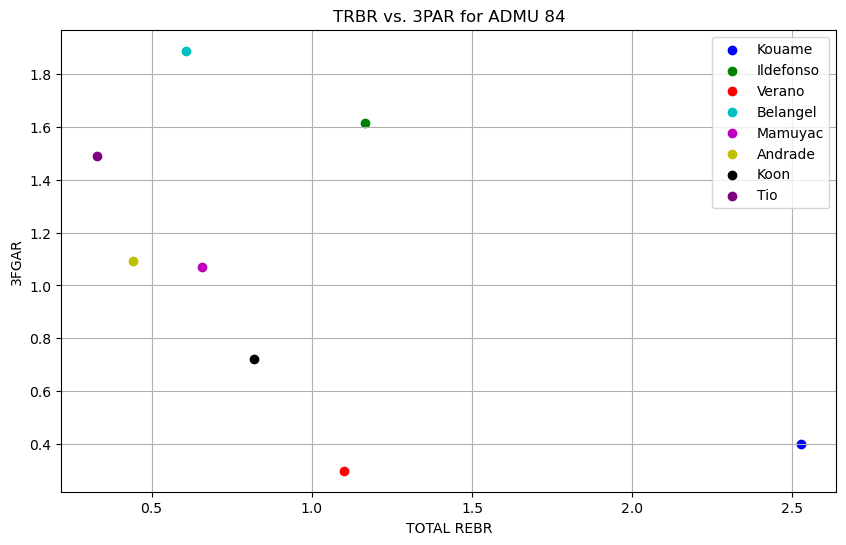

In [13]:
def plot_scatter(dataset, x_column, y_column, label_column, colors=None, title=None, xlabel=None, ylabel=None):
    # List of standard colors for the players
    standard_colors = colors if colors else ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'purple']

    # Create a scatter plot
    plt.figure(figsize=(10, 6))

    # Iterate through the rows and plot each player
    for i, row in dataset.iterrows():
        player = row[label_column]
        color = standard_colors[i % len(standard_colors)]  # Use modulo to cycle through the colors
        plt.scatter(row[x_column], row[y_column], c=color, marker='o', label=player)

    # Add labels and title
    plt.xlabel(xlabel if xlabel else x_column)
    plt.ylabel(ylabel if ylabel else y_column)
    plt.title(title if title else f'{x_column} vs. {y_column}')

    # Add a legend
    plt.legend()

    # Show the plot
    plt.grid(True)
    plt.show()

# Example usage:
# Assuming filtered_gsw_2015 is your DataFrame
plot_scatter(admu84, 'TOTAL REBR', '3FGAR', 'Last Name', title='TRBR vs. 3PAR for ADMU 84')

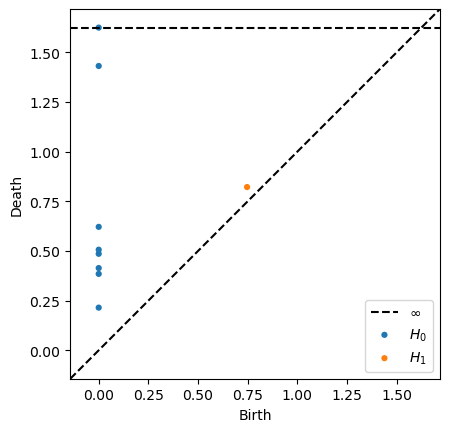

Average H0 Persistence: 0.579711662871497


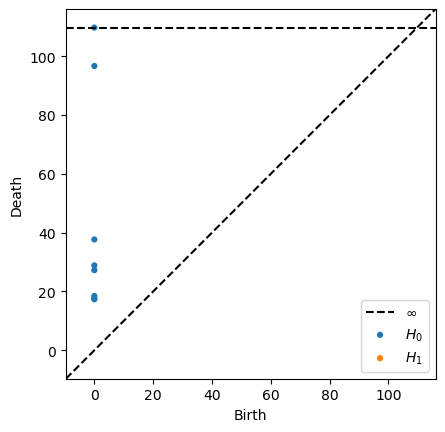

Average H0 Persistence: 34.86950901576451


In [15]:
import numpy as np
from ripser import ripser
from persim import plot_diagrams

def calculate_and_plot_persistence_diagram(dataset, columns, maxdim=1):
    # Convert your data to a numpy array
    data = dataset[columns].values

    # Calculate the persistence diagram
    result = ripser(data, maxdim=maxdim)
    dgms = result['dgms']

    # Plot the persistence diagram
    plot_diagrams(dgms, show=True)

    # Extract H0 persistence values (lifetimes of connected components)
    h0_persistence_values = [p[1] - p[0] for p in dgms[0] if p[1] != np.inf]

    # Calculate the average H0 persistence
    average_h0_persistence = np.mean(h0_persistence_values)

    print(f"Average H0 Persistence: {average_h0_persistence}")


calculate_and_plot_persistence_diagram(admu84, ['TOTAL REBR', '3FGAR'])

calculate_and_plot_persistence_diagram(admu84, style_indicators)

In [17]:
import numpy as np
from ripser import ripser

def calculate_average_h0_persistences(dataset, columns, maxdim=1):
    # Create a dictionary to store average H0 persistence for each team
    average_h0_persistences = {}

    # Group the data by team
    grouped_data = dataset.groupby("Team")

    # Iterate through each team and calculate average H0 persistence
    for team, team_data in grouped_data:
        data = team_data[columns].values
        result = ripser(data, maxdim=maxdim)
        dgms = result['dgms']

        # Extract H0 persistence values (lifetimes of connected components)
        h0_persistence_values = [p[1] - p[0] for p in dgms[0] if p[1] != np.inf]

        # Calculate the average H0 persistence for the current team
        average_h0_persistences[team] = np.mean(h0_persistence_values)

    return average_h0_persistences

average_h0_persistences_per_team = calculate_average_h0_persistences(UAAP84_cleaned, ['TOTAL REBR', '3FGAR'])

average_h0_persistences_style_indicators = calculate_average_h0_persistences(UAAP84_cleaned, style_indicators)

average_h0_persistences_style_indicators

{'ADMU': 34.86950901576451,
 'ADU': 27.34336233139038,
 'DLSU': 41.85305391039167,
 'FEU': 42.83950744356428,
 'NU': 27.896963391985214,
 'UE': 32.06740256718227,
 'UP': 36.759408133370535,
 'UST': 36.98206656319754}

In [ ]:
list(admu84.columns)

   Team  Points  Average H0 Persistence  \
0  ADMU      13                0.579712   
1    UP      12                0.645730   
2  DLSU       9                0.729168   
3   FEU       7                0.758953   
4   ADU       6                0.427726   
5    NU       6                0.453681   
6   UST       3                0.549550   
7    UE       0                0.597035   

   Average H0 Persistence Style Indicators  
0                                34.869509  
1                                36.759408  
2                                41.853054  
3                                42.839507  
4                                27.343362  
5                                27.896963  
6                                36.982067  
7                                32.067403  


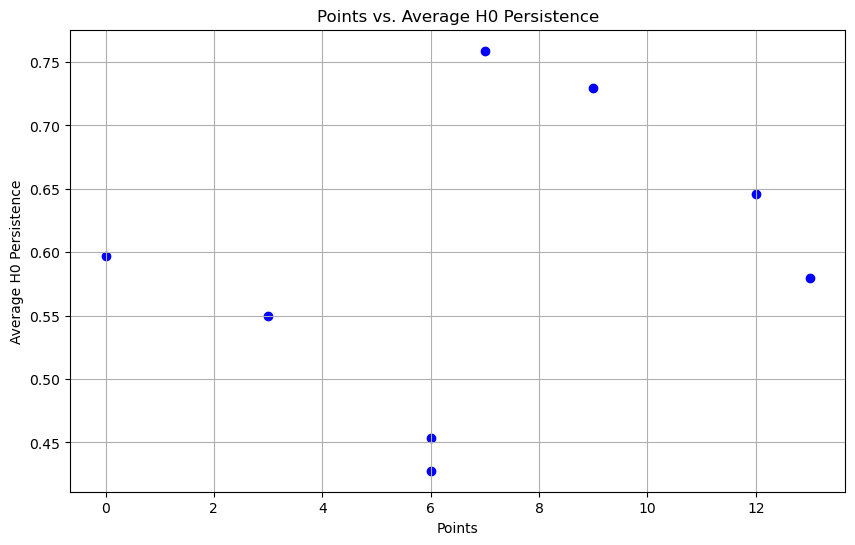

Correlation Coefficient1: 0.2524405950532678
Correlation Coefficient2: 0.27980160342201743


In [20]:
teams = ['ADMU', 'UP', 'DLSU', 'FEU', 'ADU', 'NU', 'UST', 'UE']
points = [13, 12, 9, 7, 6, 6, 3, 0]
data = {'Team': teams, 'Points': points, 'Average H0 Persistence': [average_h0_persistences_per_team[team] for team in teams], 'Average H0 Persistence Style Indicators': [average_h0_persistences_style_indicators[team] for team in teams]}
df = pd.DataFrame(data)

# Display the DataFrame
print(df)

# Plot the data
plt.figure(figsize=(10, 6))
plt.scatter(df['Points'], df['Average H0 Persistence'], color='blue')
plt.title('Points vs. Average H0 Persistence')
plt.xlabel('Points')
plt.ylabel('Average H0 Persistence')
plt.grid(True)
plt.show()

# Calculate the correlation coefficient
correlation_coefficient1 = np.corrcoef(df['Points'], df['Average H0 Persistence'])[0, 1]
correlation_coefficient2 = np.corrcoef(df['Points'], df['Average H0 Persistence Style Indicators'])[0, 1]


print(f'Correlation Coefficient1: {correlation_coefficient1}')
print(f'Correlation Coefficient2: {correlation_coefficient2}')